# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# !python -m spacy download en_core_web_sm
# !pip3 install shap
# Download en_core_web_sm for text analytics

## Main Function

>>>>>>[[STARTING PROCESS]]>>>>>
Enter the path here : datasets/messy8.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file

DataFrame Succesfully imported

Index(['Email', 'url_1', 'latitude_2', 'longitude_3', 'Response', 'ORDERDATE',
       'Date', 'PostingDate', 'LAST_GIFTDATE', 'lastTransactionDate',
       'CMP_A_FIRST_I_DATE', 'SchoolName', 'CBSA_DESC', 'AddressFull',
       'DEADCAT', 'toobigsmall', 'AVERAGE_ACCT_AGE', 'Latitude_17',
       'Longitude_18', 'LatitudeLongitude', 'PHONE', 'Salary',
       'CDOLL10_AVGGIFT', 'income', 'YearsCoding', 'emp_length', 'CompanySize',
       'url_27', 'emailaddress', 'NTEECoreCodeName', 'v2', 'JobSearchStatus',
       'ReviewText'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Salary
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Do you think you have Successive Targets based on the current target? If yes, enter the c

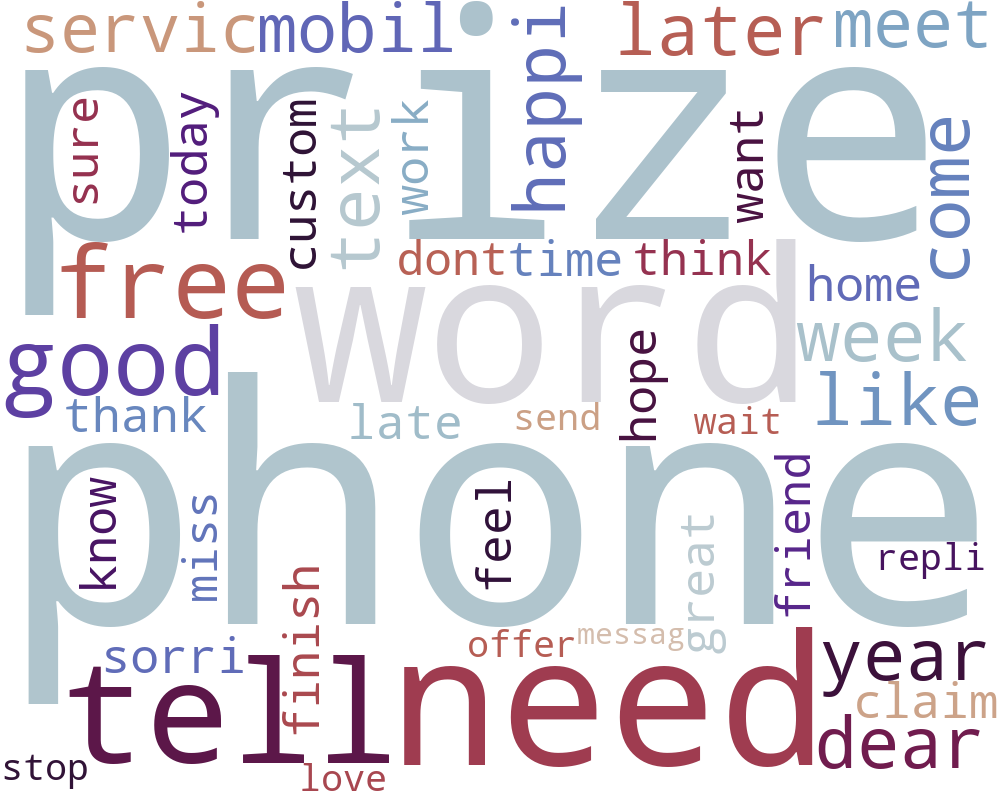

Topic Extraction Completed...



print(">>>>>>[[Outlier Winsorizing]]>>>>>")
No. of outliers handled : 0





>>>>>>[[Pearson's Correlation]]>>>>>
Dropping lastTransactionDate_year due to high correlation
Dropping lastTransactionDate-today due to high correlation
Dropping CMP_A_FIRST_I_DATE-today due to high correlation
Dropping ORDERDATE-lastTransactionDate due to high correlation
Dropping ORDERDATE-CMP_A_FIRST_I_DATE due to high correlation
Number of columns impacted in Pearson's Correlation :  5





Numeric Columns- (593, 16)
Discrete Columns - (593, 32)
Date Columns - (593, 26)
Text Columns - (593, 3)
Longitude Latitude Columns - (593, 3)
Email Columns - (593, 1)
URL Columns - (593, 2)





>>>>>>[[Encoding the Training Variables]]>>>>>





>>>>>>[[SELECTING VARIABLES THAT ARE GOOD PREDICTORS]]>>>>>
(593, 48)
Regression Selector Done...


  0%|          | 0/10 [00:00<?, ?it/s]


The final score sheet of 13 selected columns with importances:

                                  col_name  scores2   t/f
35                              SchoolName     4003  True
2                          ORDERDATE-today     1057  True
4                          PostingDate_day     1047  True
0                          ORDERDATE_month      559  True
14                     ReviewText-Polarity      417  True
1                            ORDERDATE_day      129  True
15                 ReviewText-Subjectivity       62  True
7                  lastTransactionDate_day       44  True
5                        PostingDate-today       37  True
8                    ORDERDATE-PostingDate       33  True
3                        PostingDate_month       26  True
11  lastTransactionDate-CMP_A_FIRST_I_DATE       17  True
6                lastTransactionDate_month        9  True

35 columns are eliminated during Feature Selection which are:
{'CMP_A_FIRST_I_DATE_month', 'PostingDate-lastTransactionDat

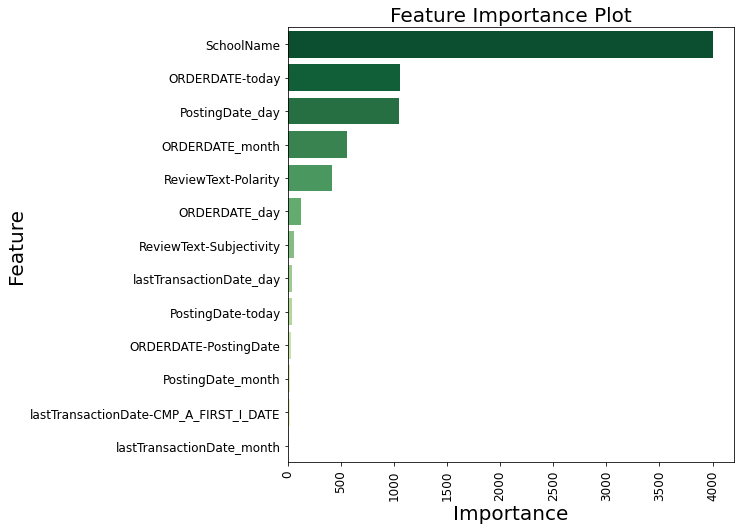






>>>>>>[[Dropping Constant Valued Columns...]]>>>>>





>>>>>>[[Rule Tree]]>>>>>


  0%|          | 0/10 [00:00<?, ?it/s]

Rule Tree Generated





>>>>>>[[Scaling]]>>>>>
>>>>>>[[Applying Transformations]]>>>>>
(593, 13)
(593,)





>>>>>>[[Sample Equation]]>>>>>
Encoding Data for Sample Equation

Generating Regression Equation...
Predicted value = 4143.755663315817*ORDERDATE_month + -163.20738031426345*ORDERDATE-today + 1992.6946697953676*PostingDate_day + 199.63492492044986*PostingDate-today + 9408.857625296536*lastTransactionDate_month + -361.3080517471621*ORDERDATE-PostingDate + 8.825845927763542*lastTransactionDate-CMP_A_FIRST_I_DATE + 866.6422156721255*SchoolName + -835296.1795488271

R squared = 0.253
(The closer R squared is to 1, the better the model is)
Total Rows of data going into training are 593 and Total Columns going into training are 13





>>>>>>[[Model Explainer Encoding]]>>>>>





>>>>>>[[Rule Tree Encoding]]>>>>>





Features Created Info : {'Initial': 33, 'Features Created': 35, 'Training Features': 13}

 #### SAVING INIT INFORMATION ####
 #### DONE ####

 TOTAL TRAINING DATA CLEAN

Pandas Apply:   0%|          | 0/19 [00:00<?, ?it/s]

Running sentiment analysis...
Polarity Analysis Completed...
Subjectivity Analysis Completed...
Topic Extraction Completed...



>>>>>>[[Encoding Columns]]>>>>>
>>>>>>[[Scaling]]>>>>>
>>>>>>[[Applying Transformations]]>>>>>



>>>>>>[[MODELLING]]>>>>>
The value of Q_S is  True
QUICK RESULTS
<class 'list'>
XGB Validation done
CAT Validation done
LGBM val done
RF Validation done
ET Validation done
linear reg done
ridge reg done
SVC done
this is what you are printing [4 6]
Accuracy : 98.74794440963599
MODEL SAVED

Total Model Training Time taken : 1.071937084197998
>>>>>>[[Modelling Completed]]>>>>>


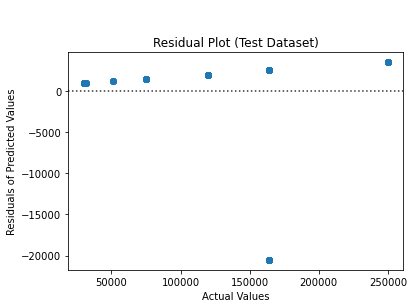

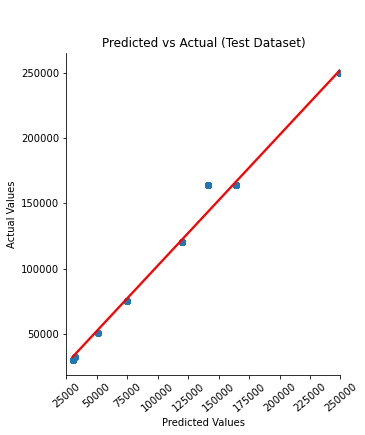


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |             250000 |                250000 |
|        2 |             185635 |                185635 |
|        3 |             164180 |                158425 |
|        4 |             164180 |                162741 |
|        5 |             164180 |                161302 |
|        6 |             164180 |                154108 |
|        7 |             164180 |                161302 |
|        8 |             114273 |                114273 |
|        9 |              51250 |                 51250 |
|       10 |              30000 |                 30000 |
+----------+--------------------+-----------------------+
>>>>>>[[Feature Importance Plot]]>>>>>


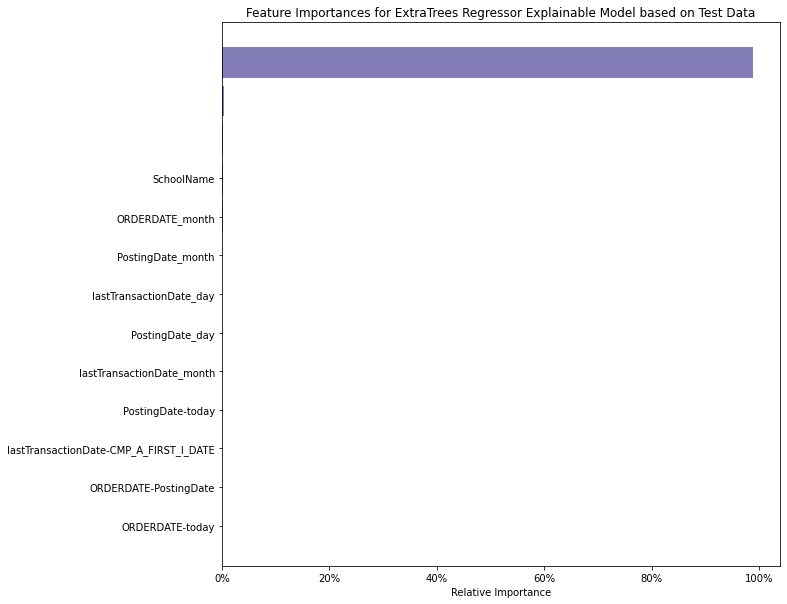

shap value shape is as follows 163
'NoneType' object has no attribute 'classes_'


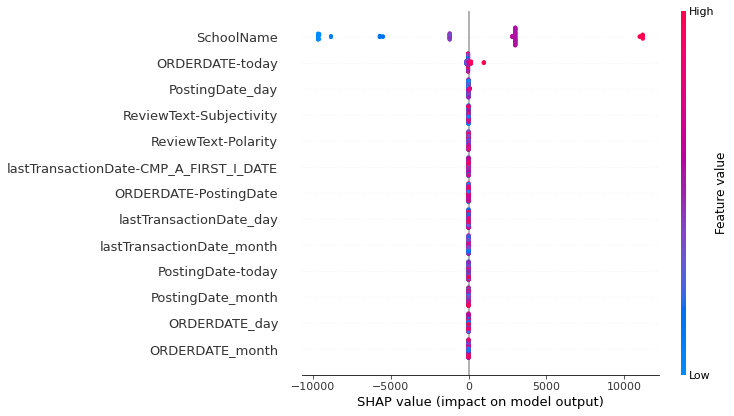

>>>>>>[[Preview Saved]]>>>>>

Code executed Successfully
>>>>>>[[Validation and Scoring Completed]]>>>>>
>>>>>>[[TRAINING VALIDATION SUCCESSFULL]]>>>>>
[Errno 2] No such file or directory: 'eda_df.csv'

#### TOTAL PROCESS TIME: 16.6718909740448 ####
>>>>>>[[PROCESS SUCCESSFULL]]>>>>>


In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
import gc
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    print(">>>>>>[[STARTING PROCESS]]>>>>>")
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        # print("Attempting to import 100 rows of the dataset")
        try:
            df, sheet_name = importFile(100,None,path)
        except ValueError:
            print("Insufficient Data Error, Please collect more information")
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True
    gc.collect()
    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            df,_ = importFile(None,sheet_name,path)
            gc.collect()
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df,info['target']) 
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                df = inputCap(df,info['target'])
                if df.empty == False:
                    init_info,validation = INIT(df,info)
                else:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            gc.collect()
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print(">>>>>>[[TRAINING VALIDATION SUCCESSFULL]]>>>>>")
                # print('\n\t #### END ####')
                gc.collect()
            else:
                print(">>>>>>[[PROCESS QUIT BECAUSE OF ERROR]]>>>>>")
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')
        print(">>>>>>[[PROCESS QUIT]]>>>>>")   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    del init_info
    gc.collect()
    try:
        eda_df = pd.read_csv('eda_df.csv')
        userInteractVisualization(eda_df,info['target'])
    except Exception as e:
        print(f'{e}')
    print('\n#### TOTAL PROCESS TIME: {} ####'.format(ee-te))
    print(">>>>>>[[PROCESS SUCCESSFULL]]>>>>>")
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,S.No,Actual Values,Predicted Values
1,485,120000.000,120000.000
2,397,164180.357,141157.393
3,467,164180.357,164180.357
4,517,164180.357,164180.357
5,50,30000.000,30000.000
...,...,...,...
96,86,32000.000,32000.000
97,228,75000.000,75000.000
98,544,164180.357,164180.357
99,719,75000.000,75000.000


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,ExtraTrees Regressor,98.75%,7213.19,52030123.54,2259.92,2962.29,00:00:00
2,Ridge Regression,98.40%,8157.76,66549063.35,4801.44,3002.41,00:00:00
3,Linear Regression,98.35%,8287.47,68682185.83,4840.64,3007.55,00:00:00
4,Ensemble (ExtraTrees Regressor+Ridge Regression),98.25%,8538.92,72913144.27,3861.03,3017.30,00:00:00
5,Light Gradient Boosting Model,95.39%,13841.61,191590163.41,4338.76,3174.77,00:00:00
6,Random Forest,95.39%,13841.89,191597934.08,4336.72,3174.78,00:00:00
7,CatBoost,79.86%,28932.50,837089298.04,23783.29,3415.13,00:00:00
8,XGBoost,8.78%,61567.78,3790591180.34,55742.81,3661.31,00:00:00
9,Support Vector Machine,-10.57%,67784.70,4594765344.81,42130.60,3692.67,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
